In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import seaborn as sns
from matplotlib import style 

In [2]:
sales_data = pd.read_parquet("sale_data.parquet")
promo_data = pd.read_excel("promo_data.xlsx")

df_sales = pd.DataFrame(sales_data)
df_promo = pd.DataFrame(promo_data)

df_sales['Date'] = pd.to_datetime(df_sales['Date']).dt.date

In [3]:
df_sales

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,FreeQty
0,2023-01-02,2873114,2879223,2878715,615,38,Kütahya,MERKEZ,430002,24,12
1,2023-01-16,2872993,2879223,2878715,615,38,Kütahya,ALTINTAŞ,430101,7,3
2,2023-01-18,2918671,2879223,2878715,615,38,Afyon,MERKEZ,30002,7,3
3,2023-01-19,2919833,2879223,2878715,615,38,Uşak,MERKEZ,640001,7,3
4,2023-01-02,2873114,2879223,2878715,616,38,Kütahya,MERKEZ,430002,24,12
...,...,...,...,...,...,...,...,...,...,...,...
11422788,2022-12-22,2928593,2927450,2927451,1052,72,Şanlıurfa,SİVEREK,630701,3,0
11422789,2022-12-12,2928640,2927450,2927451,505,45,Şanlıurfa,SİVEREK,1000000,5,0
11422790,2022-12-27,2928662,2927450,2927451,1052,72,Şanlıurfa,AKÇAKALE,630101,5,0
11422791,2022-12-22,2928741,2927450,2927451,1038,64,Şanlıurfa,SİVEREK,1000000,2,0


In [4]:
df_sales.describe()

,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,BrickId,PaidQty,FreeQty
count,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06
mean,2.881123e+06,2.880518e+06,2.881863e+06,3.049116e+03,4.416584e+01,3.315863e+05,6.044765e+00,5.334650e-01
std,2.276591e+04,6.658115e+03,1.049600e+04,1.060543e+04,3.279235e+01,1.978870e+05,1.195648e+01,4.134231e+00
min,2.853627e+06,2.879223e+06,2.878715e+06,3.170000e+02,1.400000e+01,1.010100e+04,0.000000e+00,0.000000e+00
25%,2.863949e+06,2.879249e+06,2.878789e+06,5.020000e+02,2.000000e+01,1.700020e+05,2.000000e+00,0.000000e+00
50%,2.873490e+06,2.879260e+06,2.878817e+06,5.410000e+02,3.800000e+01,3.416090e+05,4.000000e+00,0.000000e+00
75%,2.888142e+06,2.879266e+06,2.878857e+06,1.038000e+03,6.400000e+01,4.300010e+05,6.000000e+00,0.000000e+00
max,2.931082e+06,2.929489e+06,2.930513e+06,6.960800e+04,1.630000e+02,1.000000e+06,3.906000e+03,1.650000e+03


In [5]:
df_sales[["MainDistributorId", "DistributorId"]].drop_duplicates().groupby(["DistributorId"]).size().reset_index(name='counts')["counts"].unique()

array([1], dtype=int64)

In [6]:
df_sales[["MainDistributorId", "DistributorId"]].drop_duplicates().groupby(["MainDistributorId"]).size().reset_index(name='counts')

,MainDistributorId,counts
0,2879223,1
1,2879224,1
2,2879231,1
3,2879236,1
4,2879238,1
5,2879239,1
6,2879244,1
7,2879249,20
8,2879254,1
9,2879257,1


In [7]:
df_sales["ProductId"].unique() # 20

array([ 38,  49,  20,  21,  14,  39,  32,  41,  16,  30, 148,  45, 138,
        64,  72,  29,  76,  15,  25, 163], dtype=int64)

In [8]:
len(df_sales["BrickId"].unique()) # Brick

1002

In [9]:
len(df_sales["PackageId"].unique()) # Nedir bu package id?

84

In [10]:
df_sales['TotalQty'] = df_sales['PaidQty'] + df_sales['FreeQty']
df_sales["PromoRatio"] = df_sales.FreeQty/(df_sales.PaidQty+df_sales.FreeQty)
df_sales["IsPromoted"] = df_sales["FreeQty"]!=0

In [11]:
df_sales

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,FreeQty,TotalQty,PromoRatio,IsPromoted
0,2023-01-02,2873114,2879223,2878715,615,38,Kütahya,MERKEZ,430002,24,12,36,0.333333,True
1,2023-01-16,2872993,2879223,2878715,615,38,Kütahya,ALTINTAŞ,430101,7,3,10,0.300000,True
2,2023-01-18,2918671,2879223,2878715,615,38,Afyon,MERKEZ,30002,7,3,10,0.300000,True
3,2023-01-19,2919833,2879223,2878715,615,38,Uşak,MERKEZ,640001,7,3,10,0.300000,True
4,2023-01-02,2873114,2879223,2878715,616,38,Kütahya,MERKEZ,430002,24,12,36,0.333333,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422788,2022-12-22,2928593,2927450,2927451,1052,72,Şanlıurfa,SİVEREK,630701,3,0,3,0.000000,False
11422789,2022-12-12,2928640,2927450,2927451,505,45,Şanlıurfa,SİVEREK,1000000,5,0,5,0.000000,False
11422790,2022-12-27,2928662,2927450,2927451,1052,72,Şanlıurfa,AKÇAKALE,630101,5,0,5,0.000000,False
11422791,2022-12-22,2928741,2927450,2927451,1038,64,Şanlıurfa,SİVEREK,1000000,2,0,2,0.000000,False


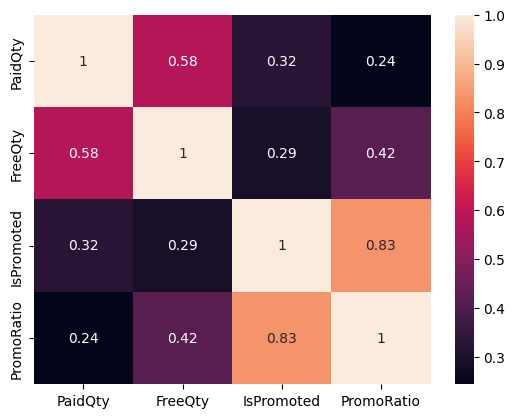

In [12]:
corr_matrix_a = df_sales[["PaidQty", "FreeQty", "IsPromoted", "PromoRatio"]].corr()
sns.heatmap(corr_matrix_a, annot=True)
plt.show()

In [13]:
df_promo["PromoRatio"] = df_promo.FreeQty/(df_promo.PaidQty+df_promo.FreeQty)
df_promo["PromoPeriod"] = df_promo.EndDate - df_promo.BeginDate
df_promo.rename(columns={"MProductId":"ProductId"}, inplace=True)

df_promo

,ProductId,BeginDate,EndDate,PaidQty,FreeQty,PromoRatio,PromoPeriod
0,14,2022-01-01,2022-01-31 23:30:00,6,2,0.250000,30 days 23:30:00
1,14,2022-01-01,2022-01-31 23:30:00,12,5,0.294118,30 days 23:30:00
2,14,2022-01-01,2022-01-31 23:30:00,24,12,0.333333,30 days 23:30:00
3,14,2022-02-01,2022-02-28 23:30:00,6,2,0.250000,27 days 23:30:00
4,14,2022-02-01,2022-02-28 23:30:00,12,5,0.294118,27 days 23:30:00
...,...,...,...,...,...,...,...
1401,148,2023-10-10,2023-10-12 23:30:00,10,1,0.090909,2 days 23:30:00
1402,148,2023-10-10,2023-10-12 23:30:00,10,4,0.285714,2 days 23:30:00
1403,148,2023-10-10,2023-10-12 23:30:00,25,3,0.107143,2 days 23:30:00
1404,148,2023-10-10,2023-10-12 23:30:00,50,10,0.166667,2 days 23:30:00


In [14]:
# Normalde olması gerekenden fazla row var

merged_data = pd.merge(df_promo, df_sales, on=["ProductId","PaidQty","FreeQty","PromoRatio"])
merged_data

,ProductId,BeginDate,EndDate,PaidQty,FreeQty,PromoRatio,PromoPeriod,Date,LocationId,MainDistributorId,DistributorId,PackageId,City,District,BrickId,TotalQty,IsPromoted
0,14,2022-01-01,2022-01-31 23:30:00,6,2,0.25,30 days 23:30:00,2023-01-12,2924460,2879266,2878857,653,İstanbul,PENDİK,342103,8,True
1,14,2022-01-01,2022-01-31 23:30:00,6,2,0.25,30 days 23:30:00,2023-08-16,2853652,2879249,2878789,652,Adana,YÜREĞİR,10201,8,True
2,14,2022-01-01,2022-01-31 23:30:00,6,2,0.25,30 days 23:30:00,2023-08-16,2853652,2879249,2878789,653,Adana,YÜREĞİR,10201,8,True
3,14,2022-01-01,2022-01-31 23:30:00,6,2,0.25,30 days 23:30:00,2022-02-14,2873114,2879223,2878715,653,Kütahya,MERKEZ,430001,8,True
4,14,2022-01-01,2022-01-31 23:30:00,6,2,0.25,30 days 23:30:00,2022-02-19,2872993,2879223,2878715,653,Kütahya,ALTINTAŞ,430101,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38387081,148,2023-10-10,2023-10-12 23:30:00,100,25,0.20,2 days 23:30:00,2023-09-18,2914891,2879266,2886435,47280,Kayseri,KOCASİNAN,380103,125,True
38387082,148,2023-10-10,2023-10-12 23:30:00,100,25,0.20,2 days 23:30:00,2023-09-18,2887274,2879266,2886435,47280,Kayseri,MELİKGAZİ,380203,125,True
38387083,148,2023-10-10,2023-10-12 23:30:00,100,25,0.20,2 days 23:30:00,2023-09-19,2860812,2886479,2886480,47280,İstanbul,FATİH,341302,125,True
38387084,148,2023-10-10,2023-10-12 23:30:00,100,25,0.20,2 days 23:30:00,2023-09-18,2861710,2915715,2919960,47280,İstanbul,KAĞITHANE,341706,125,True


In [15]:
# Frequency = Barem bazında promosyon kaç defa uygulandı (Promosyon dönemlerine göre group by yapamadım)
promo_sensitivity = merged_data.groupby(["ProductId","PaidQty","FreeQty","PromoRatio"]).size().reset_index(name='Frequency')

promo_sensitivity["TotalPaidQty"] = promo_sensitivity["PaidQty"]*promo_sensitivity["Frequency"]
promo_sensitivity["TotalFreeQty"] = promo_sensitivity["FreeQty"]*promo_sensitivity["Frequency"]
promo_sensitivity["TotalQty"] = promo_sensitivity["TotalPaidQty"]+promo_sensitivity["TotalFreeQty"]


# Promosyon uygulanmayan satışlardaki durum
no_promo_sensitivity = df_sales[(df_sales["IsPromoted"] == False)].groupby(["ProductId","PaidQty","FreeQty","PromoRatio"]).size().reset_index(name='Frequency')

no_promo_sensitivity["TotalPaidQty"] = no_promo_sensitivity["PaidQty"]*no_promo_sensitivity["Frequency"]
no_promo_sensitivity["TotalFreeQty"] = no_promo_sensitivity["FreeQty"]*no_promo_sensitivity["Frequency"]
no_promo_sensitivity["TotalQty"] = no_promo_sensitivity["TotalPaidQty"]+no_promo_sensitivity["TotalFreeQty"]

In [16]:
promo_sensitivity[promo_sensitivity["ProductId"] == 14]

,ProductId,PaidQty,FreeQty,PromoRatio,Frequency,TotalPaidQty,TotalFreeQty,TotalQty
0,14,5,1,0.166667,2012985,10064925,2012985,12077910
1,14,6,2,0.250000,18198,109188,36396,145584
2,14,10,4,0.285714,23085,230850,92340,323190
3,14,12,5,0.294118,70488,845856,352440,1198296
4,14,15,5,0.250000,30368,455520,151840,607360
5,14,20,10,0.333333,3573,71460,35730,107190
6,14,24,12,0.333333,33100,794400,397200,1191600
7,14,25,15,0.375000,2430,60750,36450,97200


In [17]:
no_promo_sensitivity[no_promo_sensitivity["ProductId"] == 14]

,ProductId,PaidQty,FreeQty,PromoRatio,Frequency,TotalPaidQty,TotalFreeQty,TotalQty
0,14,1,0,0.0,25717,25717,0,25717
1,14,2,0,0.0,16330,32660,0,32660
2,14,3,0,0.0,7570,22710,0,22710
3,14,4,0,0.0,5083,20332,0,20332
4,14,5,0,0.0,419,2095,0,2095
5,14,6,0,0.0,51,306,0,306
6,14,7,0,0.0,23,161,0,161
7,14,8,0,0.0,13,104,0,104
8,14,9,0,0.0,1,9,0,9
9,14,10,0,0.0,23,230,0,230


In [18]:
promotion_count = len(df_sales[df_sales["IsPromoted"]==True])
promotion_count

1467515

In [19]:
no_promotion_count = len(df_sales[df_sales["IsPromoted"]==False])
no_promotion_count

7541696

In [20]:
promotion_count/(no_promotion_count+promotion_count)

0.1628905128318118

In [21]:
sum(promo_sensitivity.Frequency)

38387086

In [22]:
sum(no_promo_sensitivity.Frequency)

7541696

In [23]:
df_promo["ProductId"].unique() # 13

array([ 14,  16,  20,  21,  29,  30,  32,  38,  39,  41,  49, 138, 148],
      dtype=int64)

In [24]:
# Promo datasında olmayan ürünler
no_promotion_products = set(df_sales["ProductId"].unique()).difference(df_promo["ProductId"].unique())
no_promotion_products

{15, 25, 45, 64, 72, 76, 163}

In [25]:
# En az promolu ürün 163
sum(df_sales[df_sales["ProductId"]==163]["FreeQty"])

10

In [26]:
mean_sales = (df_sales.PaidQty.mean(), df_sales.FreeQty.mean(), df_sales.PromoRatio.mean())
mean_promo = (df_promo.PaidQty.mean(), df_promo.FreeQty.mean(), df_promo.PromoRatio.mean())
mean_period = df_promo.PromoPeriod.mean()

In [27]:
print("Sales Data Averages")
print("(Paid Quantity, Free Quantity, Promotion Ratio) = ", mean_sales)

Sales Data Averages
(Paid Quantity, Free Quantity, Promotion Ratio) =  (6.0447649633247575, 0.5334650281806032, 0.02775465564209698)


In [28]:
print("Average Promotion Period = ", mean_period)

Average Promotion Period =  19 days 11:33:01.792318634


In [29]:
df_promo["PromoPeriod"].unique()

<TimedeltaArray>
['30 days 23:30:00', '27 days 23:30:00', '29 days 23:30:00',
  '1 days 23:30:00',  '2 days 23:30:00', '16 days 23:30:00',
  '4 days 23:30:00',  '3 days 23:30:00',  '5 days 23:30:00',
 '24 days 23:30:00', '14 days 23:30:00',  '0 days 23:30:00',
 '26 days 23:30:00', '17 days 23:30:00', '23 days 23:30:00',
  '6 days 23:30:00', '28 days 23:30:00', '10 days 23:30:00',
 '21 days 23:30:00',  '2 days 23:00:00', '12 days 23:30:00',
 '11 days 23:30:00']
Length: 22, dtype: timedelta64[ns]

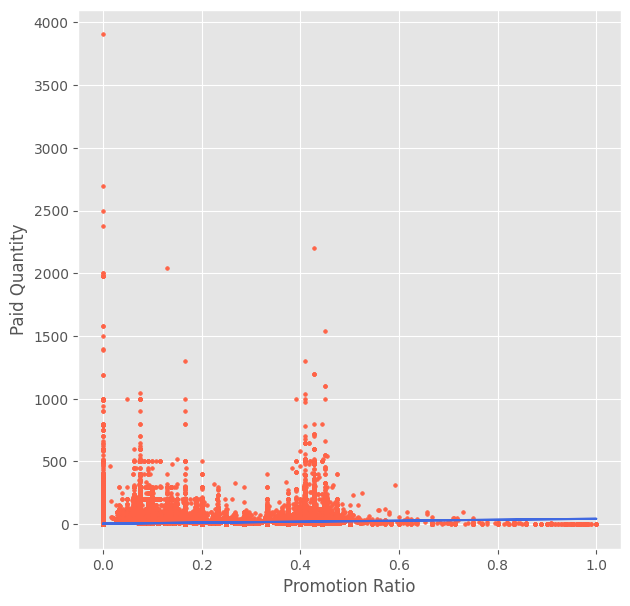

0           0.333333
1           0.300000
2           0.300000
3           0.300000
4           0.333333
              ...   
11422788    0.000000
11422789    0.000000
11422790    0.000000
11422791    0.000000
11422792    0.000000
Name: PromoRatio, Length: 9009211, dtype: float64

In [30]:
x = df_sales["PromoRatio"]
y = df_sales["PaidQty"]

plt.figure(figsize=(7,7))
plt.style.use('ggplot')
plt.scatter(x, y, c ="tomato", s = 7)
plt.xlabel("Promotion Ratio")
plt.ylabel("Paid Quantity")
                      
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.plot(x, p(x), c="royalblue")
plt.show()

df_sales["PromoRatio"]

In [31]:
sales_sensitivity = df_sales.groupby(["ProductId","Date", "IsPromoted"])["PaidQty"].sum().reset_index(name='PaidQty')
all_sales = df_sales.groupby(["ProductId","Date"])["PaidQty"].sum().reset_index(name='PaidQty')
promoted_sales = sales_sensitivity[sales_sensitivity["IsPromoted"]==True]
not_promoted_sales = sales_sensitivity[sales_sensitivity["IsPromoted"]==False]

In [32]:
sales_sensitivity[sales_sensitivity["ProductId"]==14]

,ProductId,Date,IsPromoted,PaidQty
0,14,2022-02-01,False,786
1,14,2022-02-01,True,3016
2,14,2022-02-02,False,506
3,14,2022-02-02,True,2841
4,14,2022-02-03,False,491
...,...,...,...,...
1198,14,2023-09-28,True,522
1199,14,2023-09-29,False,131
1200,14,2023-09-29,True,510
1201,14,2023-09-30,False,51


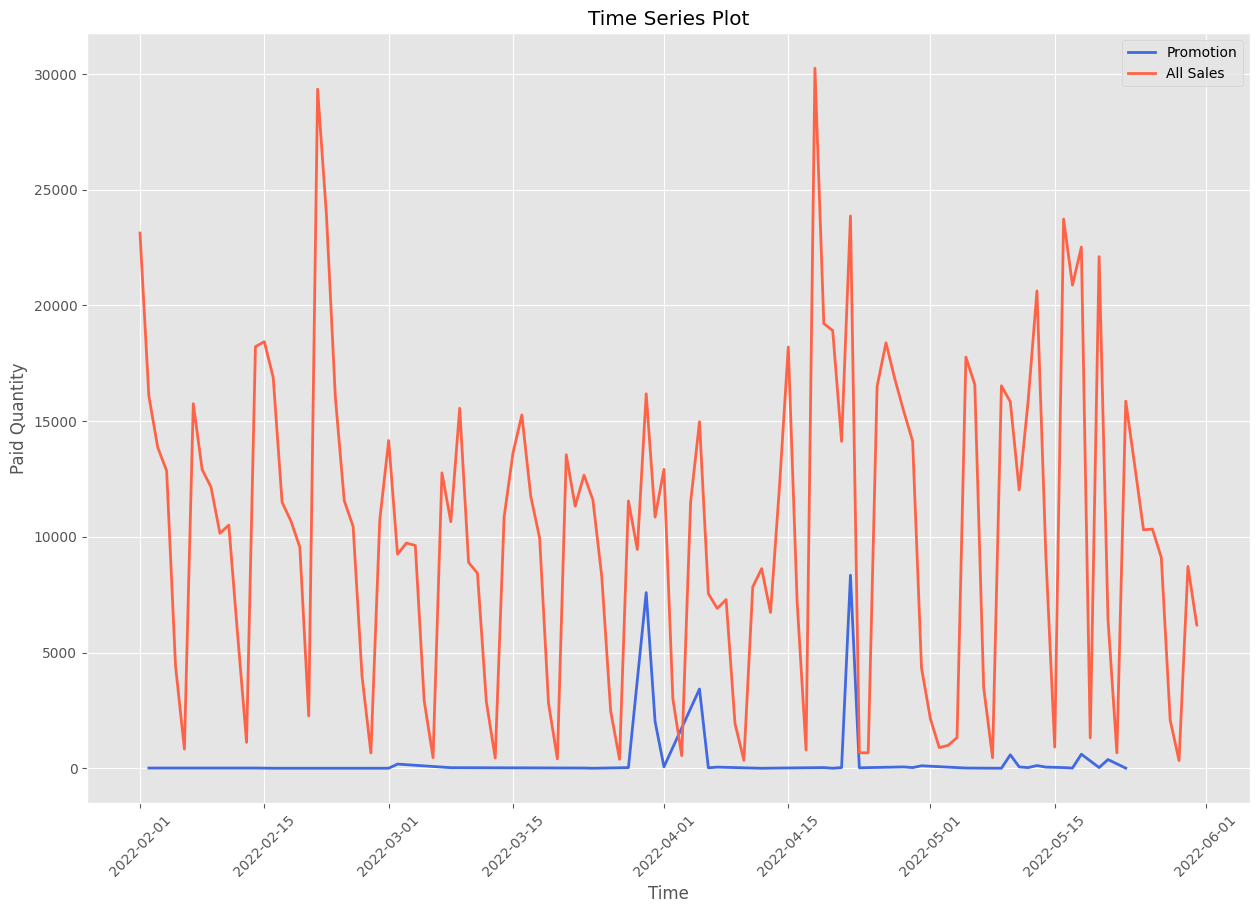

In [33]:
product_id = 45
date_before = dt.date(2022, 6, 1)

ts_a = promoted_sales[(promoted_sales["ProductId"] == product_id) & (promoted_sales["Date"] < date_before)]
ts_b = not_promoted_sales[(not_promoted_sales["ProductId"] == product_id) & (not_promoted_sales["Date"] < date_before)]
ts_c = all_sales[(all_sales["ProductId"] == product_id) & (all_sales["Date"] < date_before)]

plt.figure(figsize=(15,10))
plt.style.use('ggplot')

plt.plot(ts_a["Date"], ts_a["PaidQty"], linewidth = 2, label ='Promotion', c="royalblue")
#plt.plot(ts_b["Date"], ts_b["PaidQty"], linewidth = 2, label ='No Promotion', c="black")
plt.plot(ts_c["Date"], ts_c["PaidQty"], linewidth = 2, label ='All Sales', c="tomato")
 
plt.legend()

plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Paid Quantity')
plt.xticks(rotation=45)
plt.show()